# What are the most demanded skills for the top 3 most popular data roles? 

### Methodology

1. Clean up Skill Column 
2. Calculate skill count based on job_title_short
3. Calculate skill percentage 
4. Plot Findings 

In [2]:
# importing libraries/Loading data/minor data cleanup 
import ast
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
df = pd.read_csv(r'C:\Users\nickg\Desktop\Python\Data\data_jobs.csv')
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

c:\Users\nickg\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# sorting the data frame by united states jobs only 
df_us = df[df['job_country']== 'United States']
# explosing the job_skills column from the filtered data frame. Turning the list of values into their individual rows of data 
df_skils = df_us.explode('job_skills')

In [4]:
# creating an aggregated table of job_skills and job_titles by count. 
df_skills_count = df_skils.groupby(['job_skills', 'job_title_short']).size()
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [5]:
# format the groupby table by adding a skill count column 
df_skills_count = df_skills_count.reset_index(name='skill_count')

In [6]:
#sorting our table then viewing all changes made 
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [7]:
# We want to analyze the top three job roles from this data frame

# Acesssing the unique values for job titles, then formatting into a list.  
job_titles = df_skills_count['job_title_short'].unique().tolist()
# acessing the first 3 values using the slice operator 
job_titles = job_titles[:3]
#viewing the top 3 common job titles 
job_titles

['Data Scientist', 'Data Analyst', 'Data Engineer']

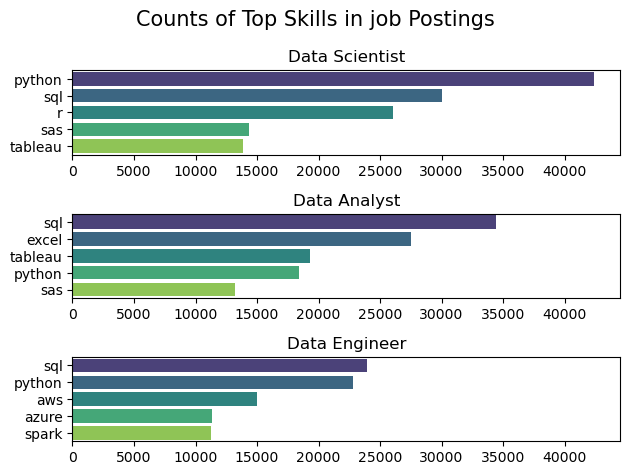

In [8]:
# Lets plot these three job roles and their skills 
# for Count of Top Skills 
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles): 
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], palette='viridis')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(ax[0].get_xlim()) # setting the x limit for each graph to the maximum value between all, in this case the first graph has the highest counts
fig.suptitle('Counts of Top Skills in job Postings', fontsize=15)
plt.tight_layout()
plt.show()

In [9]:
# using our filtered data frame for united states jobs, create a separate dataframe that counts the total jobs for each title 
# we will want to merge this data into our data frame used for the plot above. 
# this is necessary to create a percentage metric and go futher in depth

df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [10]:
# merging the two data frames, and renaming to skills percent
df_skills_percent = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [11]:
# lets now create our percentage column 
df_skills_percent['skill_percent'] = ((df_skills_percent['skill_count'] / df_skills_percent['jobs_total']) * 100).round()
df_skills_percent #viewing our new column 

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.0
1,sql,Data Analyst,34452,67816,51.0
2,sql,Data Scientist,30034,58830,51.0
3,excel,Data Analyst,27519,67816,41.0
4,r,Data Scientist,26022,58830,44.0
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.0
1866,vb.net,Senior Data Scientist,1,12946,0.0
1867,fortran,Machine Learning Engineer,1,921,0.0
1868,planner,Cloud Engineer,1,423,0.0


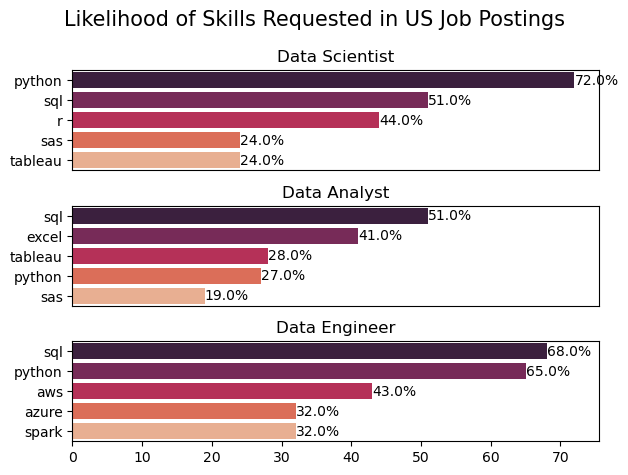

In [13]:
# Likelihood of Skills Requested 
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles): 
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], palette='rocket', )
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(ax[0].get_xlim())# setting the x limit for each graph to the maximum value between all, in this case the first graph has the highest counts
    
    for index, value in enumerate(df_plot['skill_percent']): # adding the % sign to each bar in the figure
       ax[i].text(value , index, f'{value}%', va='center') # Adding text to the X and Y position where the value ends in the graph and adding a % 
    if i != len(job_titles) -1:  # removing all x labels except for the last graph 
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
plt.tight_layout()
plt.show()